In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

First I will try it on the biggest field of view and then I will query the found result for subsets of it

In [2]:
f = 8.3e9
l = (c := 299_792_458) / f
D = 13.5
theta = 1.22 * l / D ; radius = theta * 180 / np.pi / 2

In [3]:
f"θ_FOV = {theta * 180 / np.pi * 60 :.2f} arcminutes"

'θ_FOV = 11.22 arcminutes'

In [4]:
import importlib
import targetexplore
importlib.reload(targetexplore)
importlib.reload(targetexplore.gaia)
importlib.reload(targetexplore.targets)

<module 'targetexplore.targets' from '/datax/users/obs/osea/seticore/python/targetexplore/targets.py'>

In [5]:
from astropy.coordinates import SkyCoord
from astropy import units as u
from targetexplore import Targets

# Galactic Center in galactic coords
gc_gal = SkyCoord(l=0*u.deg, b=0*u.deg, frame='galactic')

In [6]:
radius = 6 # arcminutes (fov 12 arcminutes)

In [7]:
tgts = Targets(gc_gal, radius)

INFO: Query finished. [astroquery.utils.tap.core]


/datax/users/obs/osea/seticore/python/targetexplore/_utils/conversion.py:8: RuntimeWarning: divide by zero encountered in divide
  return c / (D * theta_FOV / 1.22) / 1e9


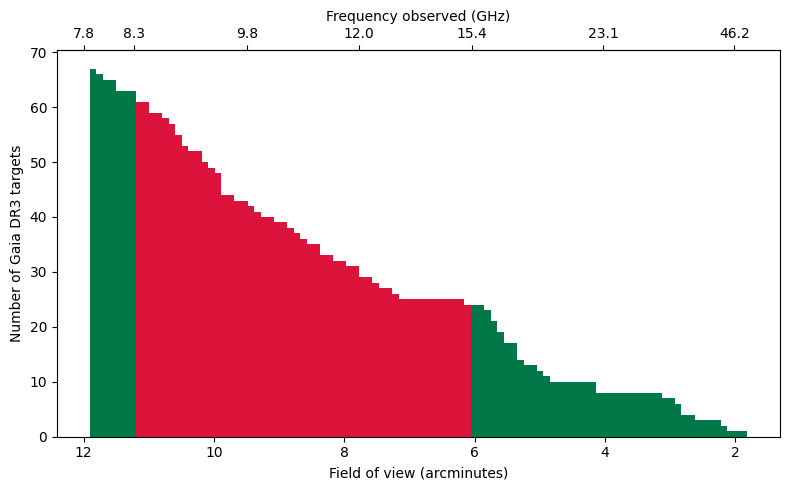

In [8]:
tgts.hist_separation(highlight=True, telescope="MeerKAT", band="5b")

Red marks MeerKAT's band 5b fields of view

## Distance estimates

<Axes: xlabel='parallax', ylabel='number of targets'>

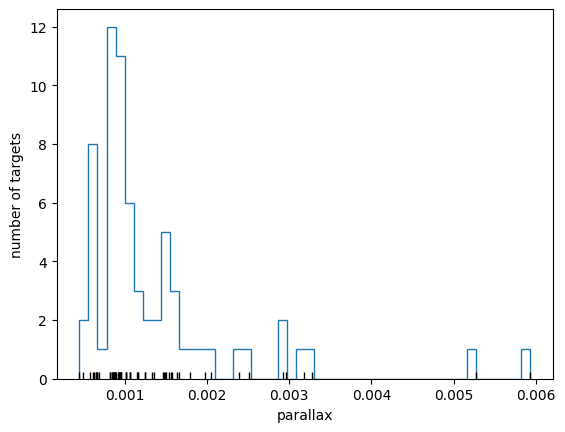

In [9]:
tgts.hist_parallax()

<Axes: xlabel='distance (pc)', ylabel='number of targets'>

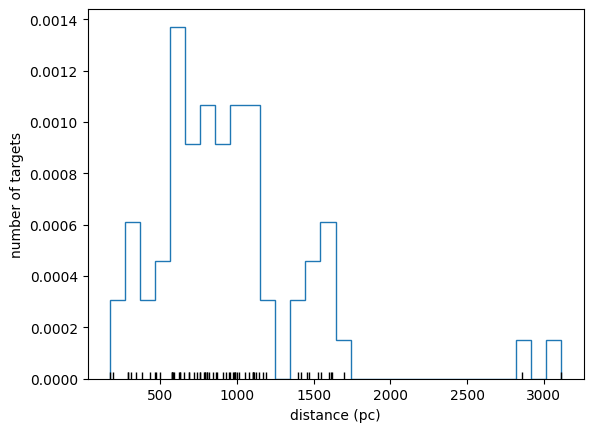

In [13]:
tgts.hist_distance(bins=30)

/datax/users/obs/osea/seticore/python/targetexplore/_utils/distance.py:19: RuntimeWarning: invalid value encountered in divide
  norm_posterior = posterior / simpson(posterior, r)


(<Axes: title={'center': 'Hertzsprung–Russell Diagram'}, xlabel='BP − RP', ylabel='Absolute G magnitude (M_G)'>,
 None,
 None)

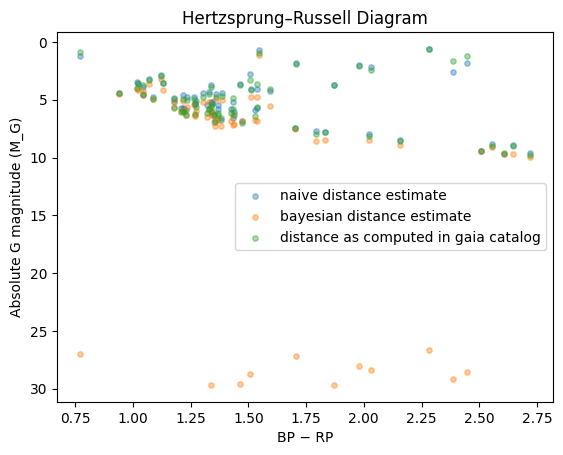

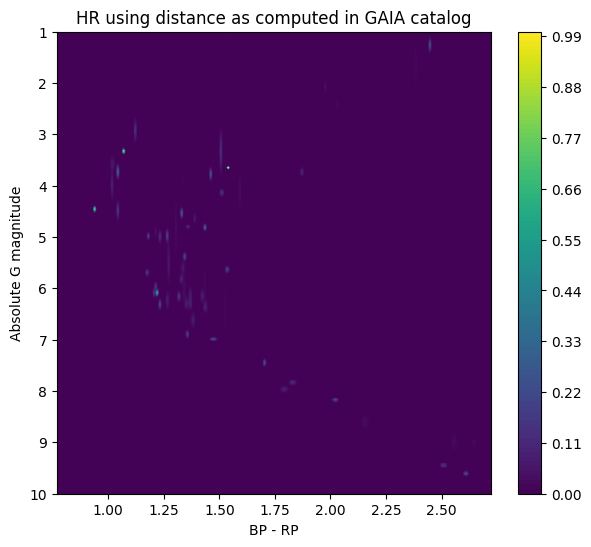

In [11]:
tgts.hr(heatmap=False, cmap="viridis")